# Loan Data from Prosper : Communicate findings
## by Iyanujesu Akinyefa


## Investigation Overview

> In this investigation, I wanted to look at the characteristics of loans that could be used to predict their borrower APR. The main focus was on the original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, Employment Status , Term.



## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

## Distribution of Borrower Annual Percentage Rate
The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

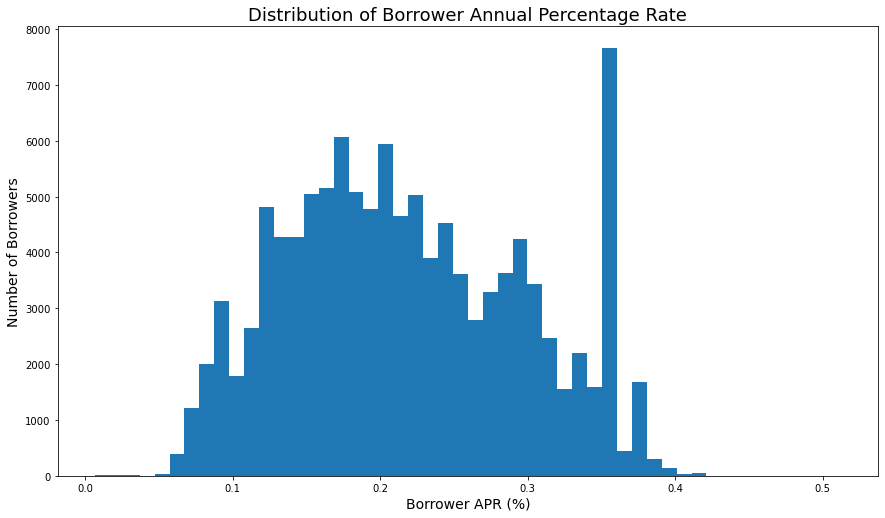

In [3]:
fig, ax = plt.subplots(figsize=(14.70, 8.27))
plt.hist(data= loan_data, x= 'BorrowerAPR', bins = 50)
ax.set_xlabel('Borrower APR (%)', fontsize= 14)
ax.set_ylabel('Number of Borrowers',  fontsize= 14)
ax.set_title('Distribution of Borrower Annual Percentage Rate',  fontsize= 18)
plt.show();

## Distribution of Loan Amount collected by Prosper Borrowers
Loan Original Amount in the dataset plotted on a logarithm scale takes on value from around 1k to around 30k. The distribution of Loan amount takes on a multimodal shape with the highest peak around $4k



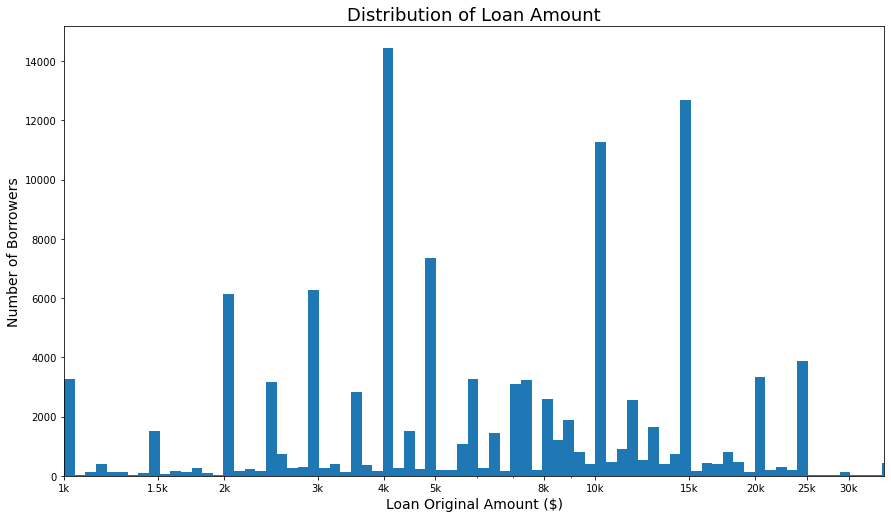

In [4]:
bins_size = 10 ** np.arange(0, np.log10(loan_data['LoanOriginalAmount'].max())+0.020, 0.020)
plt.figure(figsize=(14.70, 8.27))
plt.hist(data=loan_data, x='LoanOriginalAmount', bins=bins_size);
plt.xscale('log')
x_ticks = [1000, 1500, 2000, 3000, 4000, 5000, 8000, 10000, 15000, 20000, 25000, 30000]
labels = ['1k', '1.5k', '2k', '3k', '4k', '5k', '8k', '10k', '15k', '20k', '25k', '30k']
plt.xticks(x_ticks, labels)
plt.xlim(1000, 35000)
plt.xlabel('Loan Original Amount ($)', fontsize= 14)
plt.ylabel('Number of Borrowers', fontsize= 14)
plt.title('Distribution of Loan Amount', fontsize= 18)
plt.show()

## BorrowerAPR and BorrowerRate
The correlation between BorrowerAPR and BorrowerRate is 0.99, which indicates that they are strongly positive correlatively. Higher BorrowerAPR rate is strongly related to higher BorrowerRate rate

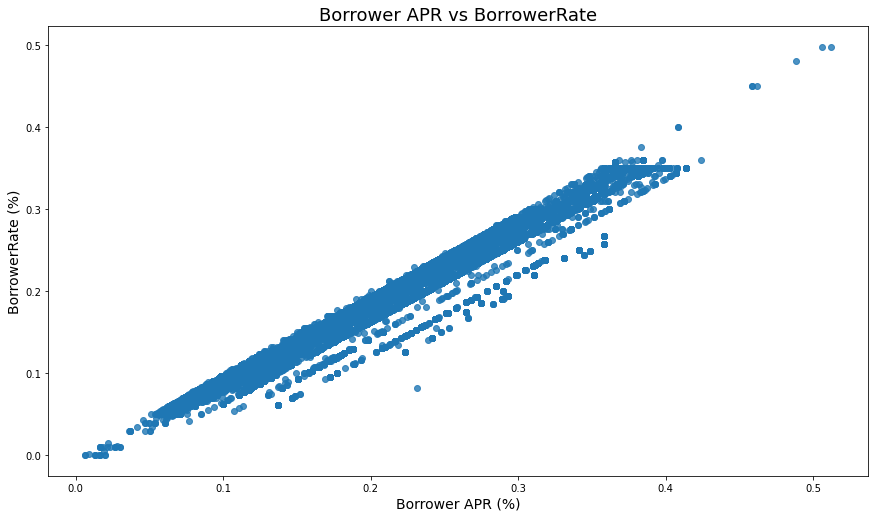

In [5]:
plt.figure(figsize=(14.70, 8.27))
sb.regplot(data= loan_data, x= 'BorrowerAPR', y= 'BorrowerRate', fit_reg= False)
plt.xlabel('Borrower APR (%)', fontsize= 14)
plt.ylabel('BorrowerRate (%)', fontsize= 14)
plt.title('Borrower APR vs BorrowerRate',  fontsize= 18)
plt.show()

## OriginalLoanAmount and MonthlyLoanPayment
This shows that there is a positive correlation between the original loan amount and the monthly payment of loan. The higher the loan amount, the higher the monthly payment of loan. 

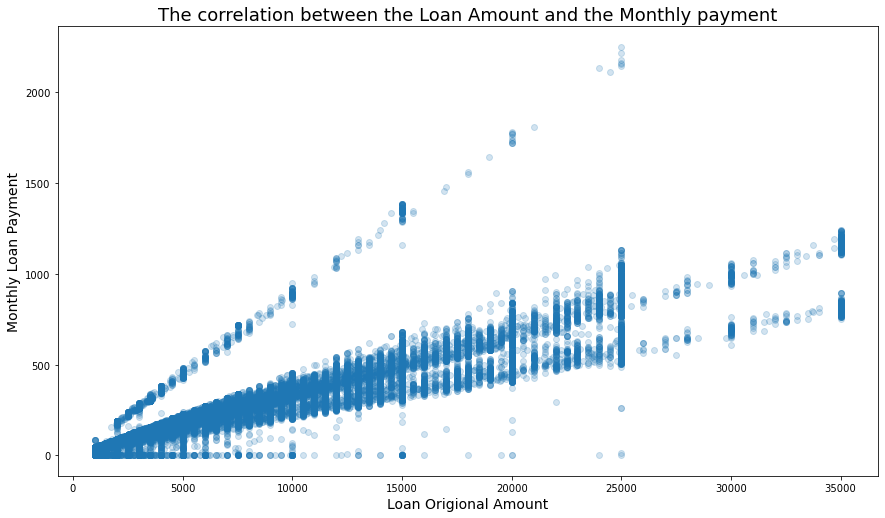

In [6]:
plt.figure(figsize=(14.70, 8.27))
sb.regplot(data = loan_data, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', fit_reg= False, x_jitter= 0.3, scatter_kws= {'alpha':0.2})
plt.title('The correlation between the Loan Amount and the Monthly payment',  fontsize= 18)
plt.xlabel('Loan Origional Amount', fontsize=14)
plt.ylabel('Monthly Loan Payment', fontsize=14);

## Prosper Loan Ratings by Term of Loan
There is a interaction between prosper rating and term. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers 

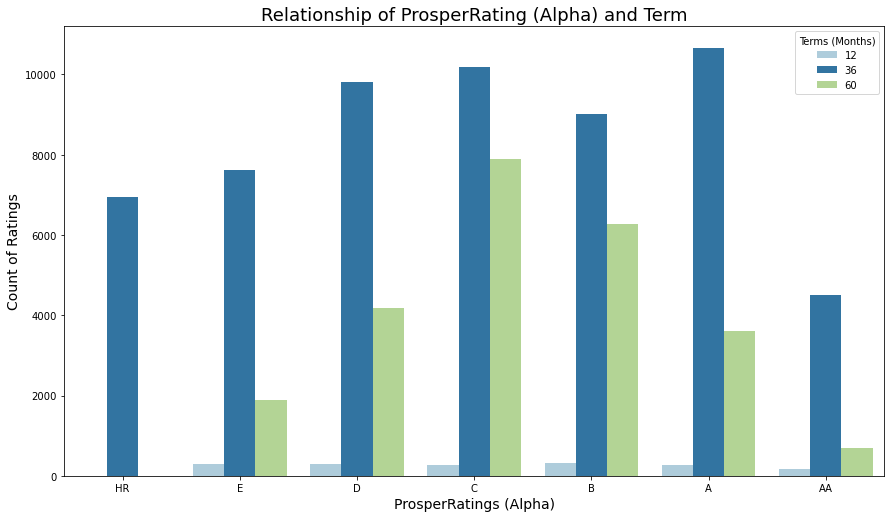

In [7]:
#convert the ProsperRating Alpha to ordered type
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = rate_order)
loan_data['ProsperRating (Alpha)'] = loan_data['ProsperRating (Alpha)'].astype(ordered_var)


plt.figure(figsize=(14.70, 8.27))
sb.countplot(data=loan_data, x='ProsperRating (Alpha)', hue='Term', palette='Paired');
plt.legend(loc=1, title='Terms (Months)')
plt.title('Relationship of ProsperRating (Alpha) and Term',  fontsize= 18);
plt.xlabel('ProsperRatings (Alpha)', fontsize= 14)
plt.ylabel('Count of Ratings', fontsize= 14)
plt.show();

In [10]:
!jupyter nbconvert Slide_deck-Copy1.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Slide_deck-Copy1.ipynb to slides
[NbConvertApp] Writing 802179 bytes to Slide_deck-Copy1.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Hp\anaconda3\envs\data_analysis\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Hp\anaconda3\envs\data_analysis\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Hp\anaconda3\envs\data_analysis\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Hp\anaconda3\envs\data_analysis\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C